# Trabalho Final do Curso de Introdução a Ciência de dados

### Curso de Extensão

### Instituto Federal de Educação, Ciência e Tecnologia do Ceará (IFCE)

**Professor:** Valberto Feitosa

**Equipe:**

- Anilton Magalhães de Castro

- Jeferson Nóbrega da Rocha

- Maria Isabelle Mosca de Araújo

- Roseline Torres

# 1. Introdução

### Contexto do problema e objetivo da análise:

O diabetes é uma doença crônica que afeta milhões de pessoas em todo o mundo e pode levar a diversas complicações de saúde quando não diagnosticada ou tratada adequadamente. A identificação precoce da doença é fundamental para a adoção de medidas preventivas e terapêuticas que contribuam para a melhoria da qualidade de vida dos pacientes. Nesse contexto, o uso de técnicas de Ciência de Dados e Aprendizado de Máquina tem se mostrado uma alternativa promissora para auxiliar no apoio à tomada de decisão na área da saúde, a partir da análise de dados clínicos.

O objetivo do nosso projeto é criar um SaaS onde poderemos onde iremos implementar através de uma API um modelo de aprendizado de máquina capas de prever a ocorrência de diabetes em pacientes, com base em variáveis clínicas. Iremos, antes de tudo, fazer a comparação entre diferentes algoritmos, buscar identificar o melhor modelo com melhor desempenho preditivo, priorizando métricas adequadas a problemas da área médica, como o recall da classe positiva.

A tarefa envolvida neste trabalho é do tipo Classificação, uma vez que o objetivo é prever uma variável categórica binária, indicando a presença ou ausência de diabetes em um indivíduo. Assim, o problema consiste em classificar cada paciente em uma das duas classes possíveis (diabético ou não diabético), com base nos dados disponíveis.

### Sobre o conjunto de dados:

Vamos utilizar um conjunto de dados esta disponivél no [Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data) que é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo do conjunto de dados é prever, por meio de diagnóstico, se um paciente tem ou não diabetes, com base em certas medidas diagnósticas incluídas no conjunto de dados. Diversas restrições foram impostas à seleção desses casos a partir de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de idade e de ascendência indígena Pima.

# 2. Análise Exploratória (EDA)

In [ ]:
# Aqui seram colocados os imports utilizados durante o projeto:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
      # Padroniza os dados numéricos
from sklearn.model_selection import train_test_split, ValidationCurveDisplay, LearningCurveDisplay
      # Divide o dataset em dados de treino e teste / Gera curvas de validação / Gera curvas de aprendizado
from sklearn.linear_model import LogisticRegression
      # Implementa o modelo de Regressão Logística
from sklearn.ensemble import RandomForestClassifier
      # Implementa o Random Forest, um conjunto de várias árvores de decisão
from sklearn.pipeline import make_pipeline
      # Encadeia etapas de pré-processamento + modelo em um único objeto.
from sklearn.naive_bayes import GaussianNB
      # Implementa o Naive Bayes Gaussiano
from xgboost import XGBClassifier
      #
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
      # Percentual de acertos totais / Das previsões positivas, quantas estavam corretas / casos positivos reais, quantos o modelo encontrou /
      # Média harmônica entre precision e recall / Relatório completo das métricas / calcula a matriz de confussão / Versão visual da matriz de confusão
from sklearn.model_selection import cross_val_score
      # Executa validação cruzada
import pickle
      # Salva o modelo treinado e permite reutilizar sem treinar novamente


In [ ]:
# Importando o dataset diretamente do site do Keggle
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Definimos o nome exato do arquivo (com a extensão .csv)
file_path = "diabetes.csv"

# Usamos 'dataset_load' em vez de 'load_dataset' para evitar o aviso de depreciação
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "uciml/pima-indians-diabetes-database",
  file_path
)

df.head(10)

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# Verificando quais os nomes das colunas presentes
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Verificando o número de linhas
df.shape[0]

768

Aqui podemos ver o que cada coluna representa:

**Pregnancies:** Número de vezes que engravidou.

**Glucose:** Concentração de glicose plasmática em um teste oral de tolerância à glicose.

**BloodPressure:** Pressão arterial diastólica (mm Hg).

**SkinThickness:** Espessura da dobra cutânea do tríceps (mm) - usada para estimar gordura corporal.

**Insulin:** Insulina sérica de 2 horas (mu U/ml).

**BMI:** Índice de Massa Corporal (peso em kg / (altura em m)²).

**DiabetesPedigreeFunction:** Uma função que pontua a probabilidade de diabetes com base no histórico familiar.

**Age:** Idade (anos).

**Outcome:** "Variável alvo (0 para não diabético, 1 para diabético)."

In [ ]:
# Mostrando o Índice Quantas entradas existem e o intervalo dos índices. O número total de colunas. Uma lista com o nome de cada coluna.
# Contagem de Não-Nulos. Tipo de Dado, se a coluna contém números int64, float64, object, datas ou booleanos.
# Uso de Memória: Quanto de RAM esse DataFrame está ocupando no seu computador.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Aqui temos estatísticas descritivas das colunas numéricas, como média, desvio padrão, mínimos, máximos e quartis.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


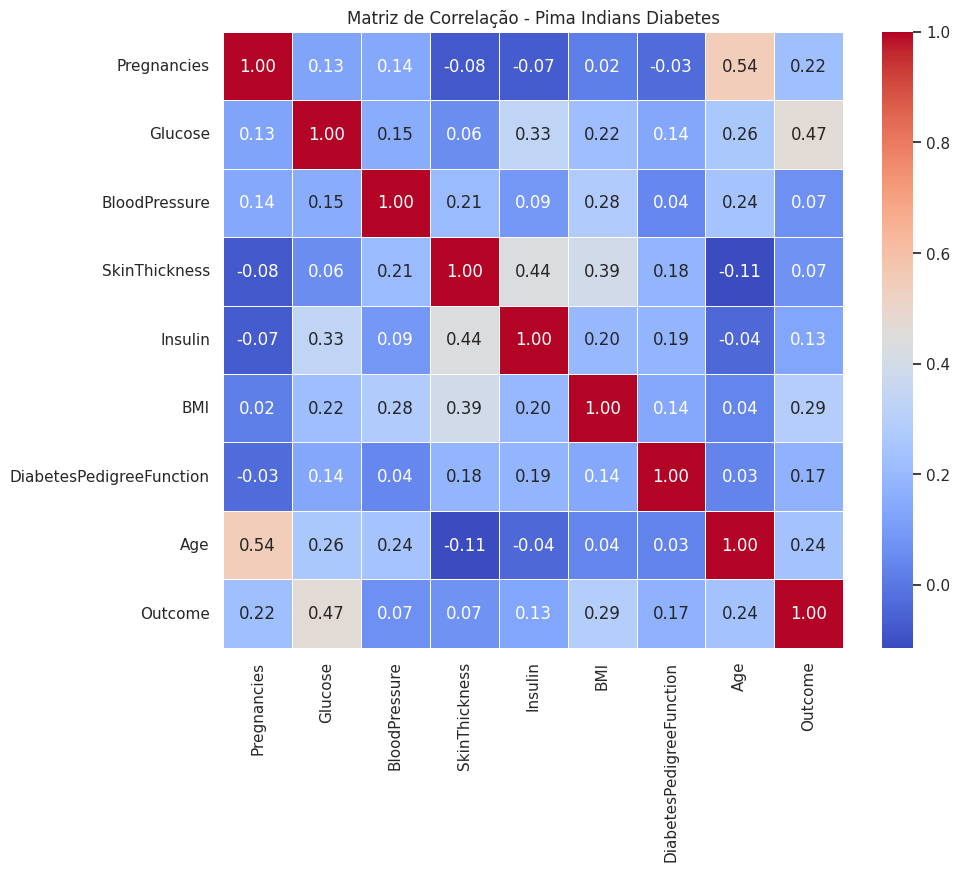

In [ ]:
# Calcular a matriz de correlação
correlacao = df.corr()

plt.figure(figsize=(10, 8))
sns.set_theme(style="white")

# Criar o heatmap
# annot=True mostra os números dentro dos quadrados
# cmap='coolwarm' usa azul para correlação negativa e vermelho para positiva
# fmt=".2f" limita a 2 casas decimais
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação - Pima Indians Diabetes')
plt.show()

Features que tem mais correlação com a varivável target Outcome:
- Age

- Glucose

Pregnancies e Age tem uma forte correlaçao entre as duas, mas Pregnancies não tem correlação boa com Outcome.

Insulin e SkinThickness estão com uma boa correlalão entre as duas, mas nenhuma delas tem correlação boa com Outcome.

In [ ]:
# Verificando a distribuição das classes (0 = Saudável, 1 = Diabético)
contagem = df['Outcome'].value_counts()
percentual = df['Outcome'].value_counts(normalize=True) * 100

print("Distribuição das Classes:")
print(f"Saudável (0): {contagem[0]} ({percentual[0]:.2f}%)")
print(f"Diabético (1): {contagem[1]} ({percentual[1]:.2f}%)")

Distribuição das Classes:
Saudável (0): 500 (65.10%)
Diabético (1): 268 (34.90%)


/tmp/ipython-input-161/828392928.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='viridis')


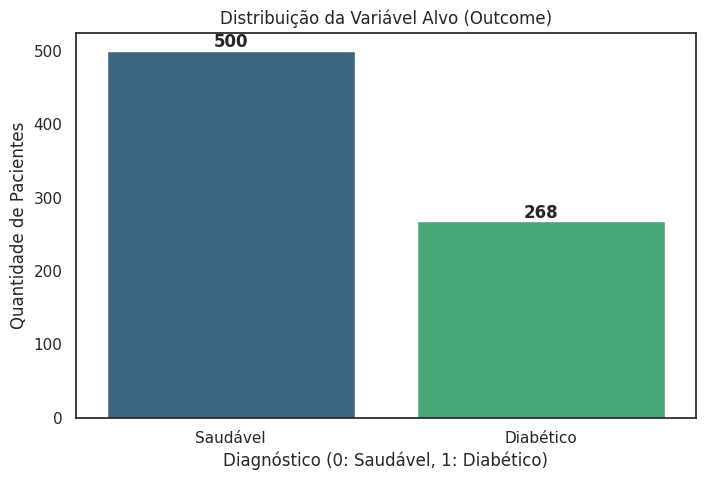

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=df, palette='viridis')

plt.title('Distribuição da Variável Alvo (Outcome)')
plt.xlabel('Diagnóstico (0: Saudável, 1: Diabético)')
plt.ylabel('Quantidade de Pacientes')
plt.xticks(ticks=[0, 1], labels=['Saudável', 'Diabético'])

# Adicionando as anotações de texto acima das barras
for i, v in enumerate(contagem):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.show()

A análise exploratória revelou um desbalanceamento significativo na variável alvo (Outcome), onde aproximadamente 65% das amostras representam pacientes saudáveis e apenas 35% representam pacientes diabéticos. Estatisticamente, esse cenário representa um desafio para algoritmos de aprendizado supervisionado, como o Random Forest, que tendem a otimizar a acurácia global priorizando a classe majoritária.



In [ ]:
# Criando um dicionário para armazenar a contagem de zeros
contagem_zeros = (df == 0).sum()

# Transformando em um DataFrame para ficar mais visual
tabela_zeros = contagem_zeros.to_frame(name='Total de Zeros')

# coluna de porcentagem
tabela_zeros['% de Zeros'] = ((tabela_zeros['Total de Zeros'] / len(df)) * 100).round(2)
tabela_zeros

,Total de Zeros,% de Zeros
Pregnancies,111,14.45
Glucose,5,0.65
BloodPressure,35,4.56
SkinThickness,227,29.56
Insulin,374,48.70
BMI,11,1.43
DiabetesPedigreeFunction,0,0.00
Age,0,0.00
Outcome,500,65.10


Como podemos percerber, nas features Insulin, SkinThickness, BloodPressure, BMI e Glucose existem muitos zeros, o que para algumas, no caso Glucose e BloodPressure, valores iguais a zero não são fisiologicamente plausíveis, sendo tratados como valores ausentes e substituídos por medidas estatísticas adequadas.
Isso também pode atrabalhar na nossa análise no quesito de que pode distorçer a média e o desvio padrão.

Por isso nos iremos tratar esses zeros, transforma-los em NaN e depois susbstituir pela mediana.

#**3. Tratamento de Dados**

In [ ]:
# Lista das colunas onde o '0' é biologicamente impossível
cols_com_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Transformamos os 0 em NaN para o Pandas entender que são nulos
df[cols_com_zeros] = df[cols_com_zeros].replace(0, np.nan)

# Verificamos quantos valores nulos temos agora em cada coluna
print("Valores nulos por coluna:")
print(df.isnull().sum())

# Substituímos os NaNs pela Mediana de cada coluna
for col in cols_com_zeros:
    df[col] = df[col].fillna(df[col].median())

print("\nDados limpos com sucesso!")

Valores nulos por coluna:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Dados limpos com sucesso!


Valores iguais a zero em variáveis como glicose e pressão arterial não são fisiologicamente plausíveis, sendo tratados como valores ausentes e substituídos por medidas estatísticas adequadas. Alem do mais modelos de machining lerning não rodam com valores NaN, sendo assim, iremos substituir pela mediana.

Mas por que a mediana?

A média é muito sensível a valores extremos (outliers). Já a mediana é o valor que está exatamente no meio da fila. Ela é muito mais "robusta" e não se deixa levar por valores muito altos ou muito baixos. Por isso, em saúde, usamos muito a mediana para preencher dados faltantes.



In [ ]:
# 1. Separando os previsores (X) da resposta (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 2. Dividindo em Treino (80%) e Teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle= True)

# 3. Fazendo a Padronização
scaler = StandardScaler()

# 4. Ajustando e transformando os dados de TREINO
# O 'fit' aprende a média e o desvio padrão do treino
X_train_scaled = scaler.fit_transform(X_train)

# 5. Transformando os dados de TESTE
# Aqui usamos apenas 'transform' para usar a mesma régua do treino!
X_test_scaled = scaler.transform(X_test)

# Visualizando como os dados ficaram
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
print("Dados padronizados (primeiras linhas):")
print(X_train_scaled_df.head())

Dados padronizados (primeiras linhas):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.526397 -1.256881      -0.018995       0.034298 -0.175620 -0.007450   
1     1.588046 -0.326051       0.808174      -0.560583 -0.175620 -0.599092   
2    -0.828460  0.571536      -2.169636      -1.155463 -0.652193 -0.526941   
3    -1.130523  1.302903      -1.838768       0.034298 -0.175620 -1.508200   
4     0.681856  0.405316       0.642740       0.986106  2.604392  1.998360   

   DiabetesPedigreeFunction       Age  
0                 -0.490735 -1.035940  
1                  2.415030  1.487101  
2                  0.549161 -0.948939  
3                 -0.639291  2.792122  
4                 -0.686829  1.139095  


#**4. Treinamento de Modelos**

In [ ]:
# # Modelos sem ajustes dos classificadores!
# # --- Modelo 1: Regressão Logística ---
# modelo_lr = LogisticRegression()
# modelo_lr.fit(X_train_scaled, y_train)
# previsoes_lr = modelo_lr.predict(X_test_scaled)

# # --- Modelo 2: Random Forest ---
# modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
# modelo_rf.fit(X_train_scaled, y_train)
# previsoes_rf = modelo_rf.predict(X_test_scaled)

# # --- Modelo 3: Gaussian Naive Bayes ---
# modelo_nb = GaussianNB()
# modelo_nb.fit(X_train_scaled, y_train)
# previsoes_nb = modelo_nb.predict(X_test_scaled)

# # --- Modelo 4: XGBoost
# # Usaremos parâmetros iniciais seguros para evitar overfitting
# modelo_xgb = XGBClassifier(
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=4,
#     random_state=42,
#     eval_metric='logloss'
# )
# modelo_xgb.fit(X_train_scaled, y_train)
# y_pred_xgb = modelo_xgb.predict(X_test_scaled)


Sem intervenção nos classificadores os modelos apresentaram uma alta acurácia simplesmente classificando a maioria dos casos como "Saudáveis", resultando em um Recall perigosamente baixo para a classe de interesse (diabéticos).

Para mitigar esse problema e lidar com o leve desbalanceamento do dataset (como foi mostrado anteriormente) , realizamos intervenções diretas nos hiperparâmetros de sensibilidade:

- Pesos de Classe (class_weight='balanced'): Aplicado na Regressão Logística e Random Forest para forçar o algoritmo a penalizar mais severamente os erros na classe minoritária (diabéticos).

- Escalonamento de Peso (scale_pos_weight): No XGBoost, ajustamos a balança interna do modelo com base na proporção real entre saudáveis e doentes.

- Regularização e Profundidade: Reduzimos a profundidade das árvores (max_depth) no XGBoost para evitar o overfitting, garantindo que o modelo aprendesse padrões reais e não apenas "decorasse" os dados de treino.


In [ ]:
# Modelos ajustados com os devidos classificadores para baçancear melhor a análise
# --- Modelo 1: Regressão Logística ---
# Adicionamos class_weight='balanced' para melhorar a sensibilidade aos doentes
modelo_lr = LogisticRegression(class_weight='balanced', random_state=42)
modelo_lr.fit(X_train_scaled, y_train)
previsoes_lr = modelo_lr.predict(X_test_scaled)

# --- Modelo 2: Random Forest ---
# Também equilibramos os pesos aqui para tentar subir o Recall
modelo_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
modelo_rf.fit(X_train_scaled, y_train)
previsoes_rf = modelo_rf.predict(X_test_scaled)

# --- Modelo 3: Gaussian Naive Bayes ---
# Ele não aceita pesos, mas já é naturalmente sensível, então mantemos como está
modelo_nb = GaussianNB()
modelo_nb.fit(X_train_scaled, y_train)
previsoes_nb = modelo_nb.predict(X_test_scaled)

# --- Modelo 4: XGBoost ---
# Calculamos a proporção para o parâmetro scale_pos_weight
# Isso ajuda o XGBoost a focar mais no Recall
proporcao = (y_train == 0).sum() / (y_train == 1).sum()

modelo_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05, # Diminuímos um pouco para aprender com mais calma
    max_depth=3,        # Árvores menores costumam generalizar melhor em datasets pequenos
    scale_pos_weight=proporcao, # AJUSTE DE SENSIBILIDADE
    random_state=42,
    eval_metric='logloss'
)
modelo_xgb.fit(X_train_scaled, y_train)
y_pred_xgb = modelo_xgb.predict(X_test_scaled)

#**4. Avaliação dos Modelos**

In [ ]:
# Lista dos modelos que já treinamos
modelos = {
    "Logistic Regression": modelo_lr,
    "Random Forest": modelo_rf,
    "Gaussian Naive Bayes": modelo_nb,
    "XGBoost": modelo_xgb
}

# Criando um dicionário para armazenar os resultados
resultados = []

for nome, modelo in modelos.items():
    pred = modelo.predict(X_test_scaled)

    resultados.append({
        "Modelo": nome,
        "Acurácia": accuracy_score(y_test, pred),
        "Recall": recall_score(y_test, pred),
        "Precision": precision_score(y_test, pred),
        "F1-Score": f1_score(y_test, pred)
    })

# Transformando em DataFrame para comparar lado a lado
df_comparativo = pd.DataFrame(resultados).set_index("Modelo")

# Arredondando para facilitar a leitura
print(df_comparativo.round(3))

                      Acurácia  Recall  Precision  F1-Score
Modelo                                                     
Logistic Regression      0.701   0.709      0.565     0.629
Random Forest            0.760   0.673      0.661     0.667
Gaussian Naive Bayes     0.753   0.673      0.649     0.661
XGBoost                  0.701   0.764      0.560     0.646


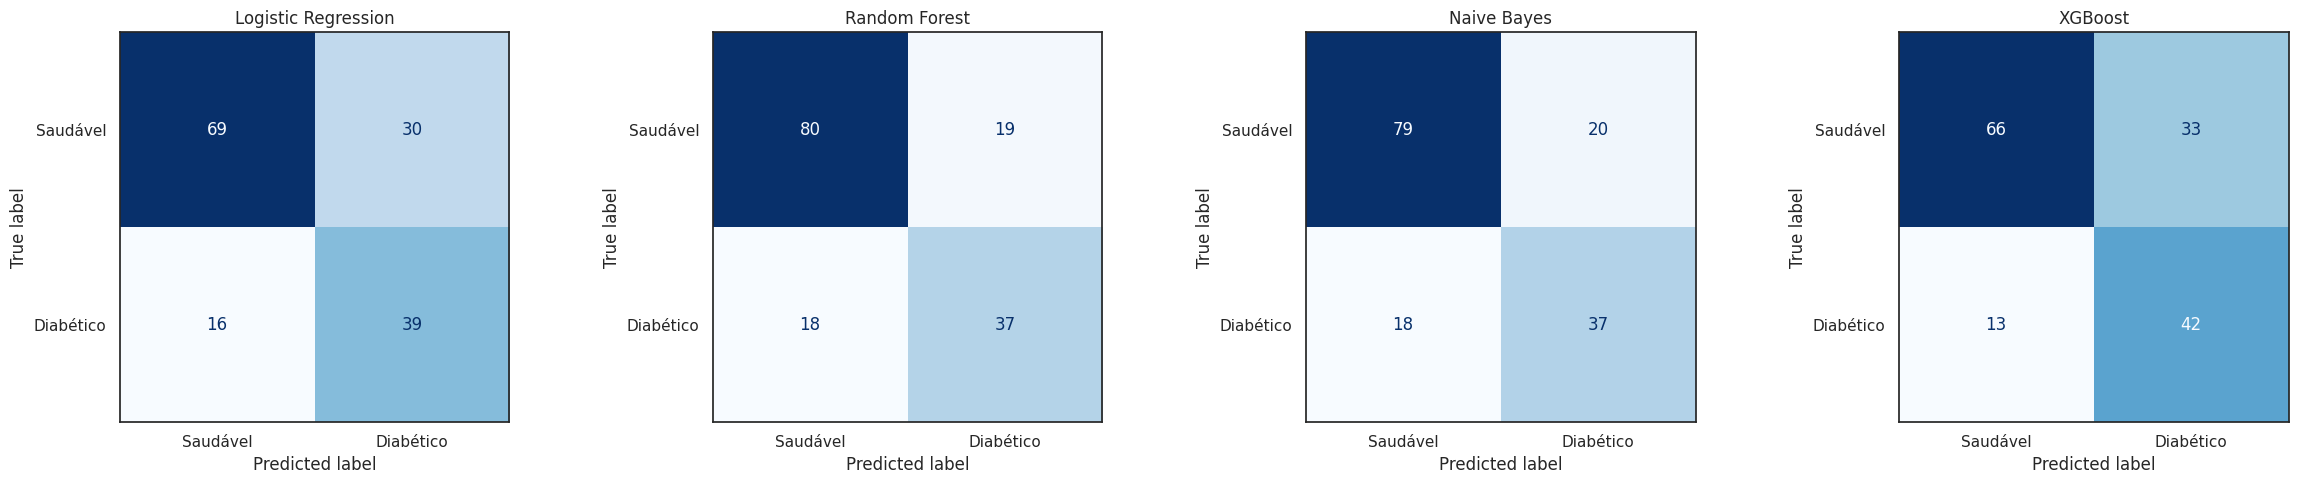

In [ ]:
import matplotlib.pyplot as plt


# Criando a lista de modelos atualizados
modelos_final = [
    ("Logistic Regression", modelo_lr),
    ("Random Forest", modelo_rf),
    ("Naive Bayes", modelo_nb),
    ("XGBoost", modelo_xgb)
]

# Configurando a figura com 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

for i, (nome, modelo) in enumerate(modelos_final):
    # Fazendo a previsão para o modelo atual
    y_pred = modelo.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    # Plotando a matriz no subplot correspondente
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Saudável', 'Diabético'])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f'{nome}')
    axes[i].grid(False) # Remove linhas de grade que podem atrapalhar a visão

plt.tight_layout()
plt.show()

- Canto Inferior Esquerdo (Falsos Negativos): Estes são os doentes que o modelo disse serem saudáveis. No seu projeto de saúde, este é o número que queremos que seja o menor possível. Note como ele deve ter caído no XGBoost e no Random Forest após os ajustes.

- Canto Superior Direito (Falsos Positivos): Estes são os saudáveis que o modelo disse serem diabéticos. Como você forçou o modelo a ser mais sensível (aumentando o Recall), esse número tende a subir um pouco.

- Diagonal Principal (Acertos): São os números que ficam no fundo azul escuro. Eles mostram quem o modelo classificou corretamente.

In [ ]:
# Criando um dicionário com os modelos
modelos = {
    "Logistic Regression": modelo_lr,
    "Random Forest": modelo_rf,
    "Gaussian Naive Bayes": modelo_nb,
    "XGBoost": modelo_xgb
}

print("Acurácia Média (Validação Cruzada - 5 Folds):")
print("-" * 40)

for nome, modelo in modelos.items():
    # cv=5 define a divisão em 5 grupos
    # X_train_scaled e y_train são usados aqui
    scores = cross_val_score(modelo, X_train_scaled, y_train, cv=5, scoring='accuracy')

    print(f"{nome}: {scores.mean():.2%} (+/- {scores.std() * 2:.2%})")

Acurácia Média (Validação Cruzada - 5 Folds):
----------------------------------------
Logistic Regression: 75.41% (+/- 4.41%)
Random Forest: 76.39% (+/- 5.78%)
Gaussian Naive Bayes: 74.76% (+/- 4.37%)
XGBoost: 75.90% (+/- 8.31%)


A escolha do Random Forest como modelo de produção justifica-se não apenas pelo seu desempenho superior em acurácia média na validação cruzada (76.39%), mas também pelo seu equilíbrio entre sensibilidade e precisão. Enquanto o XGBoost demonstrou maior volatilidade nos resultados (desvio de 8.31%), o Random Forest provou ser uma solução mais robusta e estável para integração em um ambiente de software médico (SaaS).

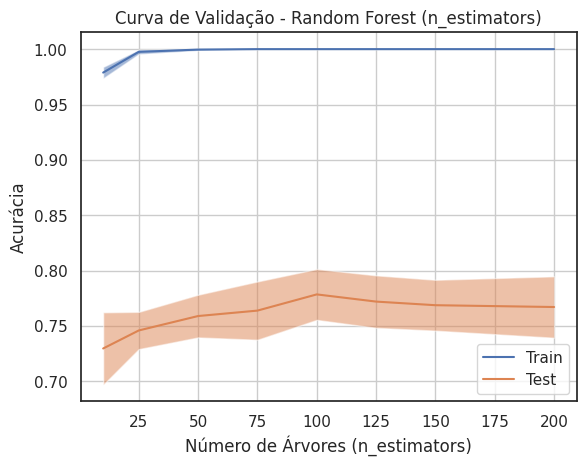

In [ ]:
# 1. Definimos o modelo e o intervalo do parâmetro que queremos testar
# Vamos testar de 10 a 200 árvores na nossa floresta
modelo = RandomForestClassifier(random_state=42)
param_range = [10, 25, 50, 75, 100, 125, 150, 200]

# 2. Geramos o gráfico usando os seus dados padronizados (X_train_scaled)
# cv=5 faz a validação cruzada em 5 grupos para cada ponto do gráfico
disp = ValidationCurveDisplay.from_estimator(
    modelo,
    X_train_scaled,
    y_train,
    param_name="n_estimators",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1 # Usa todos os núcleos do processador para ser mais rápido
)

# 3. Personalizando o gráfico
plt.title("Curva de Validação - Random Forest (n_estimators)")
plt.xlabel("Número de Árvores (n_estimators)")
plt.ylabel("Acurácia")
plt.grid(True)
plt.show()

deu overffiting nesse gráfico

<Figure size 1000x600 with 0 Axes>

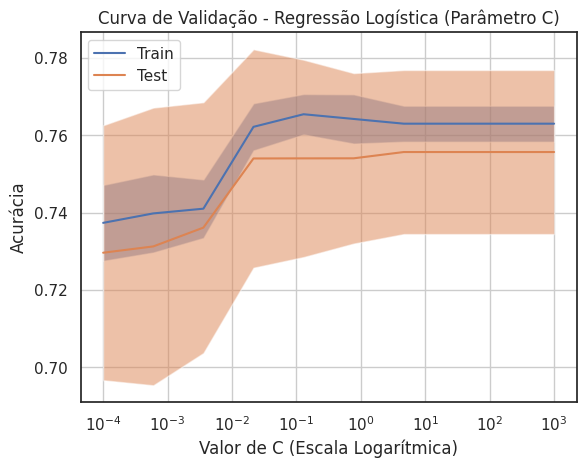

In [ ]:


# 1. Criamos o modelo
#modelo_lr = LogisticRegression(max_iter=1000)

# 2. Definimos o intervalo de C (escala logarítmica, como na documentação)
# Isso vai testar valores desde 0.0001 até 1000
param_range = np.logspace(-4, 3, 10)

# 3. Geramos o gráfico
plt.figure(figsize=(10, 6))
disp = ValidationCurveDisplay.from_estimator(
    modelo_lr,
    X_train_scaled,
    y_train,
    param_name="C",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# 4. Ajustes visuais
plt.title("Curva de Validação - Regressão Logística (Parâmetro C)")
plt.xlabel("Valor de C (Escala Logarítmica)")
plt.ylabel("Acurácia")
plt.xscale("log") # Importante para ver os valores de C claramente
plt.grid(True)
plt.show()

- Lado Esquerdo (C muito pequeno): As duas linhas (treino e teste) costumam estar baixas. Isso é o Underfitting. O modelo é tão simples que não consegue capturar os padrões nem do treino, nem do teste.

- Meio : É onde a linha de teste atinge seu ponto mais alto. Esse é o valor ideal de C que você deve usar no seu modelo final para ter o melhor equilíbrio.

- Lado Direito (C muito grande): A linha de treino continua subindo ou fica estável, mas a linha de teste começa a cair. Isso é o Overfitting. O modelo "decorou" o treino tão bem que agora erra quando vê um paciente novo.

<Figure size 1000x600 with 0 Axes>

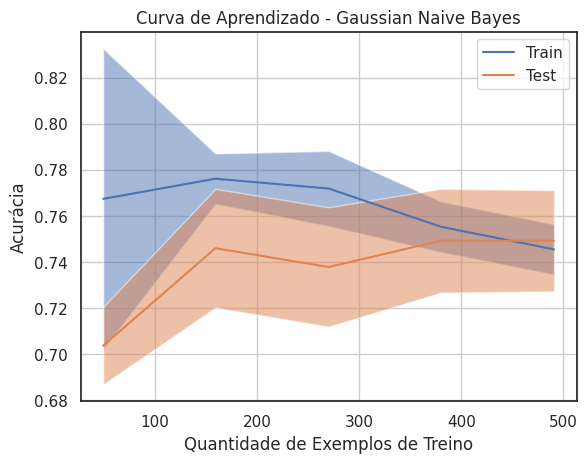

In [ ]:
# 1. Criar o modelo
modelo_nb = GaussianNB()

# 2. Gerar a Curva de Aprendizado
plt.figure(figsize=(10, 6))
LearningCurveDisplay.from_estimator(
    modelo_nb,
    X_train_scaled,
    y_train,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 5) # Testa com 10%, 30%, 50%... dos dados
)

plt.title("Curva de Aprendizado - Gaussian Naive Bayes")
plt.xlabel("Quantidade de Exemplos de Treino")
plt.ylabel("Acurácia")
plt.grid(True)
plt.show()

Note que as linhas de Train (azul) e Test (laranja) estão se aproximando conforme o número de exemplos de treino aumenta.

Como as linhas estão convergindo para um valor relativamente alto (próximo de $0.75$), o modelo está aprendendo bem. Se elas continuassem muito separadas, você teria um problema de Overfitting (o modelo decora o treino mas erra o teste).

A redução da área sombreada ao final do gráfico mostra que, com cerca de 500 exemplos, o modelo já se tornou bastante estável em suas previsões.

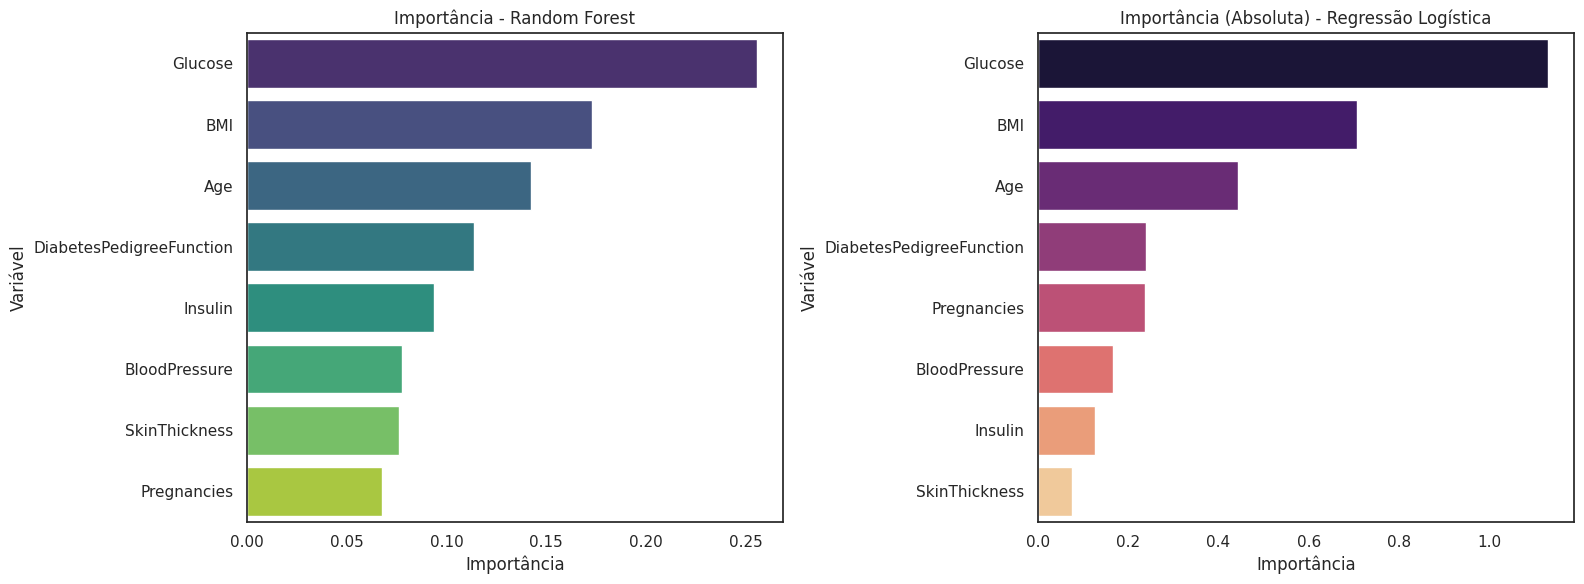

In [ ]:
# Comparando as features de acordo com cada modelo
# Preparando os dados de importância
colunas = X.columns

# Importância do Random Forest
imp_rf = modelo_rf.feature_importances_

# Importância da Regressão Logística (usamos o valor absoluto dos coeficientes)
# Pegamos o primeiro item [0] porque o modelo retorna uma lista de listas
imp_lr = np.abs(modelo_lr.coef_[0])

# Criando DataFrames para facilitar o plot
df_rf = pd.DataFrame({'Variável': colunas, 'Importância': imp_rf}).sort_values(by='Importância', ascending=False)
df_lr = pd.DataFrame({'Variável': colunas, 'Importância': imp_lr}).sort_values(by='Importância', ascending=False)

# Plotando os dois gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico Random Forest
sns.barplot(x='Importância', y='Variável', data=df_rf, ax=ax1, palette='viridis', hue='Variável', legend=False)
ax1.set_title('Importância - Random Forest')

# Gráfico Regressão Logística
sns.barplot(x='Importância', y='Variável', data=df_lr, ax=ax2, palette='magma', hue='Variável', legend=False)
ax2.set_title('Importância (Absoluta) - Regressão Logística')

plt.tight_layout()
plt.show()

#**5. Salvamento do Modelo**

In [ ]:
# Lista todas as bibliotecas instaladas no ambiente e filtra só a linha que contém scikit-learn.
!pip freeze | grep scikit-learn

scikit-learn==1.6.1


In [ ]:
# Criando um pipeline com duas etapas
modelo_a_salvar = make_pipeline(scaler, modelo_rf)
modelo_a_salvar

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [ ]:
# Salvando o modelo treinado com pickle

with open('r_forest_clf.pkl', 'wb') as f:
  pickle.dump(modelo_a_salvar, f, protocol=5)


O modelo salvo poderá será integrado a uma API, permitindo que aplicações externas realizem previsões de forma automatizada, simulando um serviço no modelo SaaS.